In [1]:
import scanpy as sc
adata1=sc.read('/data/users/wangqinglin/wangqinglin_d3636615856043a6957bc3f4cd69aa28/online/data/public/public_cs_scanpy.h5ad')
adata2=sc.read('/data/work/final/03_anno/new_h5ad/anno2.h5ad')

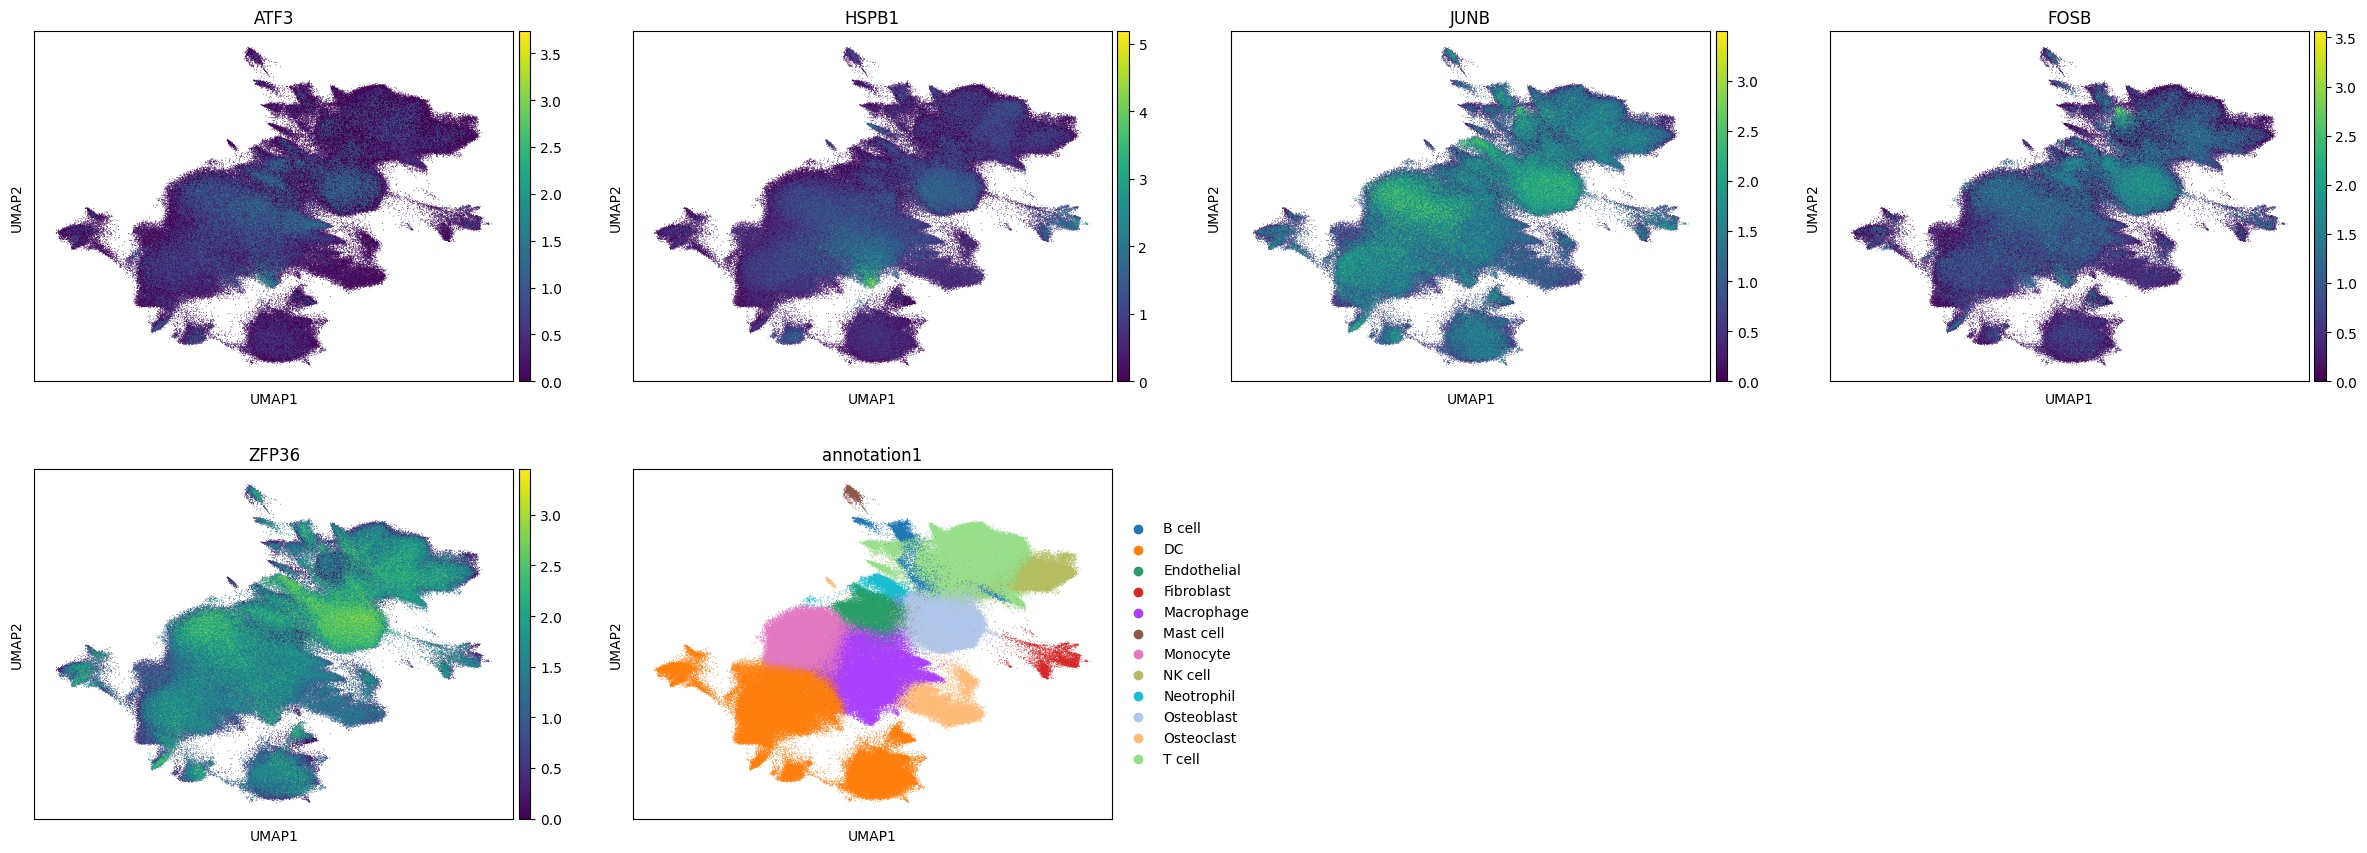

In [6]:
sc.pl.umap(adata2,color=['ATF3','HSPB1','JUNB','FOSB','ZFP36','annotation1'],use_raw=False,size=1.5)a

In [ ]:
subadata = adata[adata.obs['annotation1'] == 'Osteoblast'].copy()

In [5]:
adata1

AnnData object with n_obs × n_vars = 245135 × 45841
    obs: 'orig.ident', 'state', 'tissue', 'location', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'scDblFinder', 'contamination', 'leiden', 'r1.5', 'r1.0', 'r1.8', 'r2.0', 'anno1', 'tissue_state', 'subanno'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'anno1_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'orig.ident_colors', 'pca', 'r1.0_colors', 'r1.5_colors', 'r1.8_colors', 'r2.0_colors', 'state_colors', 'subanno_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

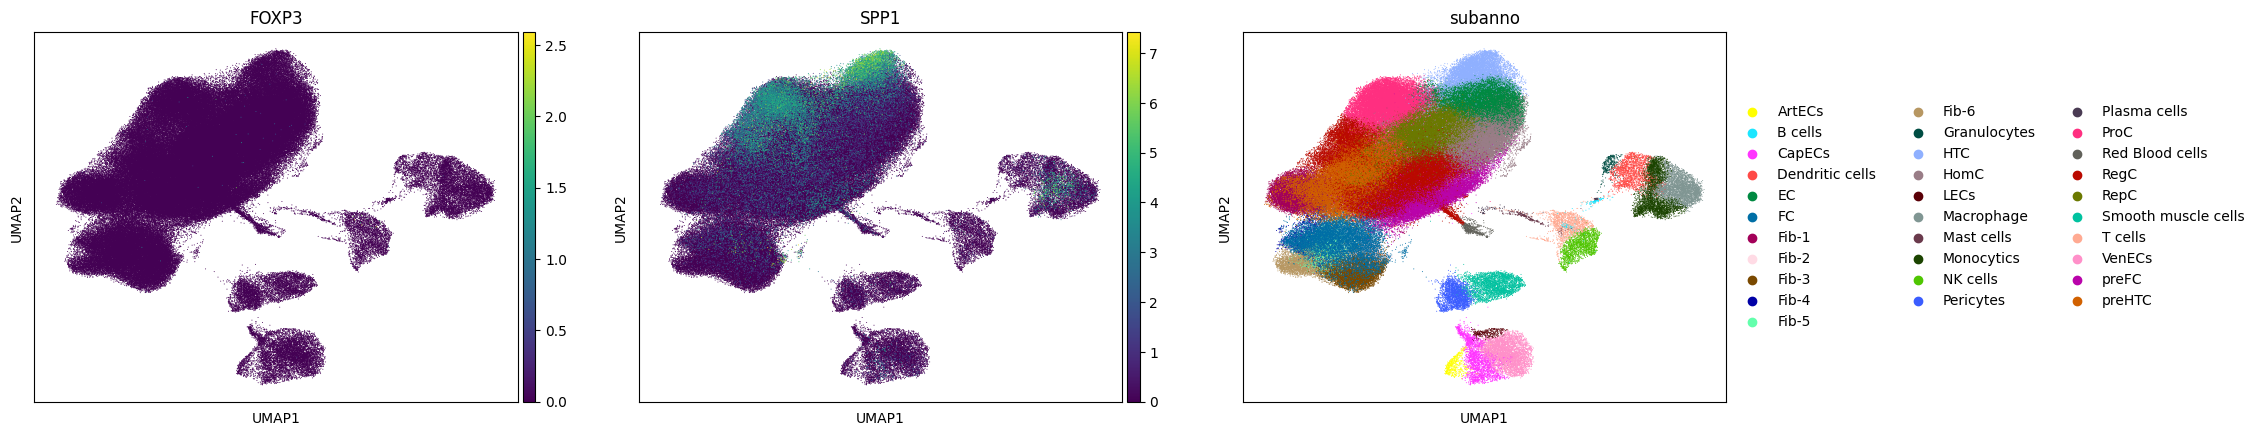

In [4]:
sc.pl.umap(adata1,color=['FOXP3','SPP1','subanno'],use_raw=False,size=2)

In [9]:
subadata=adata1[adata1.obs['subanno'].isin(['T cells','NK cells'])==True]

In [2]:
sc.pl.umap(subadata,color=['FOXP3','SPP1','subanno'],use_raw=False,size=4)

NameError: name 'sc' is not defined

In [1]:
adata1.obs['sample']=adata1.obs['orig.ident']
adata1.obs['from'] = 'tissue'  # 实质组织
adata2.obs['from'] = 'fluid'   # 关节积液
adata1.X=adata1.layers['counts']
adata2.X=adata2.layers['counts']
adata = adata1.concatenate(adata2, batch_key='sample')

NameError: name 'adata1' is not defined

In [8]:
import scvi
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="sample")

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [13]:
model = scvi.model.SCVI(
    adata,
    n_layers=3,              # 增加编码器/解码器的神经网络层数（默认2）
    n_latent=50,             # 增加潜在空间维度（默认10，建议30-100）
    gene_likelihood="zinb",  # 改用零膨胀负二项分布（对dropout多的数据更有效）
    dispersion="gene-batch",  # 允许基因和批次特异的离散度（默认"gene"）
    use_layer_norm=True,     # 启用层标准化（稳定训练）
)
model.train(
    max_epochs=100,          # 增加训练轮次（默认400）
    batch_size=1024,         # 调整批次大小（默认256，大数据集可增大）
    early_stopping=True,     # 启用早停（防止过拟合）
    plan_kwargs={"lr": 1e-3}, # 调整学习率（默认2e-3，难收敛时可降低）
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=95` in the `DataLoader` to improve performance.
/usr/local/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=95` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [4:13:45<00:00, 151.07s/it, v_num=1, train_loss_step=5.81e+3, train_loss_epoch=5.85e+3]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [4:13:45<00:00, 152.26s/it, v_num=1, train_loss_step=5.81e+3, train_loss_epoch=5.85e+3]


In [ ]:
print('finish')

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


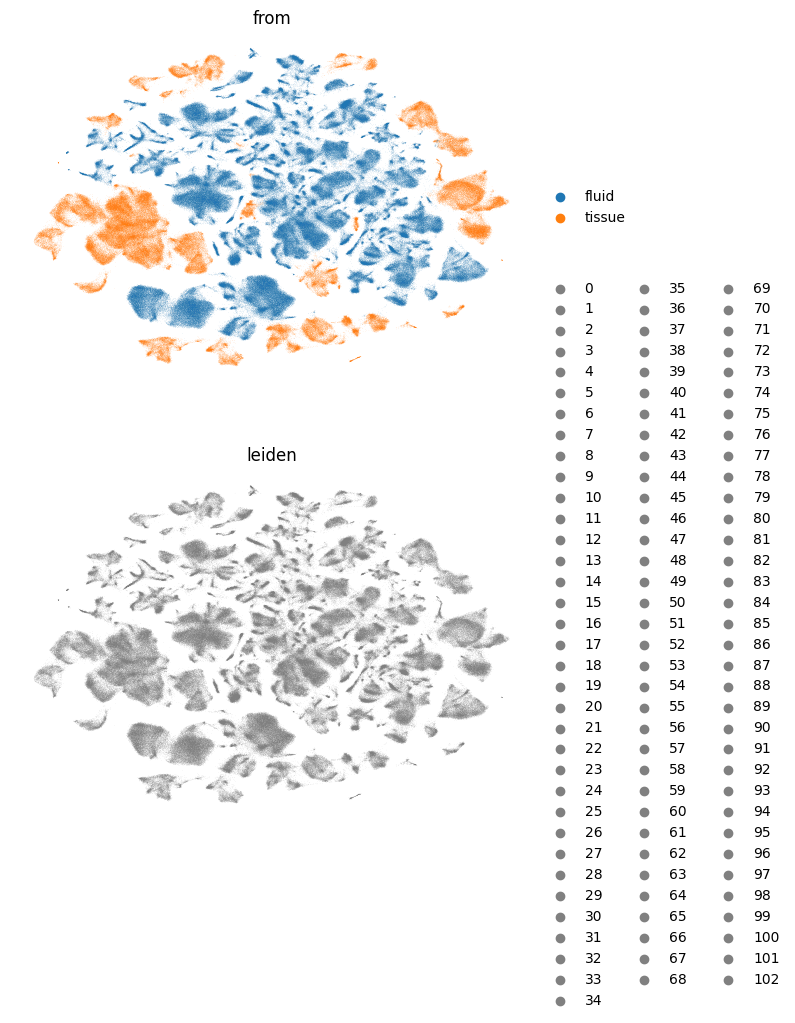

In [ ]:
adata.obsm["X_scVI"] = model.get_latent_representation()
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.leiden(adata)
sc.tl.umap(adata)
#rsc.tl.umap(adata_combined, method='rapids')
sc.pl.umap(
    adata,
    color=["from", "leiden"],
    frameon=False,
    ncols=1,
)

In [ ]:
adata.write('/data/work/final/09_stromal_integrate/integrate_stromal.h5ad')

In [ ]:
sc.pl.umap(
    adata,
    color=["from", "annotation1"],
    frameon=False,
    ncols=1,
)

In [1]:
import scanpy as sc
adata=sc.read('/data/work/final/09_stromal_integrate/integrate_stromal.h5ad')

In [2]:
del adata.X
adata.write('/data/work/final/09_stromal_integrate/integrate_stromal.h5ad')

In [1]:
import scanpy as sc
adata1=sc.read('/data/users/wangqinglin/wangqinglin_d3636615856043a6957bc3f4cd69aa28/online/data/public/public_cs_scanpy.h5ad')
adata2=sc.read('/data/work/final/03_anno/new_h5ad/anno2.h5ad')
adata1.obs['sample']=adata1.obs['orig.ident']
adata1.obs['from'] = 'tissue'  # 实质组织
adata2.obs['from'] = 'fluid'   # 关节积液
adata1.X=adata1.layers['counts']
adata2.X=adata2.layers['counts']
adata = adata1.concatenate(adata2, batch_key='sample')

/tmp/ipykernel_69/2442385789.py:9: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata1.concatenate(adata2, batch_key='sample')
/usr/local/lib/python3.9/site-packages/anndata/_core/merge.py:1362: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [ ]:
import harmonypy as hm
import numpy as np
from anndata import AnnData

In [ ]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.neighbors(adata, n_pcs=30)  # 可选，用于后续聚类
sc.tl.pca(adata, n_comps=50)     # 计算 PCA

# 运行 Harmony 校正批次效应
harmony_output = hm.run_harmony(
    adata.obsm["X_pca"],          # PCA 矩阵
    adata.obs,                    # 元数据
    "sample",                             # 批次列名
    max_iter_harmony=20,                   # 最大迭代次数
    verbose=True                           # 打印进度
)

# 将校正后的低维嵌入保存回 AnnData
adata.obsm["X_harmony"] = harmony_output.Z_corr.T  # 转置以匹配维度

# 检查校正后的 PCA
print(adata.obsm["X_harmony"].shape)

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-17 00:18:14,631 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-17 00:25:53,525 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-17 00:25:56,289 - harmonypy - INFO - Iteration 1 of 20
2025-07-17 00:30:51,053 - harmonypy - INFO - Iteration 2 of 20
2025-07-17 00:36:18,651 - harmonypy - INFO - Converged after 2 iterations


(799834, 50)


In [ ]:
print('finish')

finish


In [ ]:
# 基于 Harmony 校正后的 PCA 计算邻居图
sc.pp.neighbors(adata_combined, use_rep="X_harmony", n_pcs=30)

# UMAP 可视化
sc.tl.umap(adata_combined)
sc.pl.umap(adata_combined, color=["sample", "annotation2"], wspace=0.5)



In [ ]:
import scanpy as sc
import scanpy.external as sce
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sce.pp.bbknn(adata, 'sample', verbose=1)
#sc.pp.neighbors(adata,use_rep='X_pca_harmony')
#sc.tl.umap(adata, init_pos='X_pca_harmony')
#sc.pl.umap(adata, color=['from'], legend_fontsize=8)

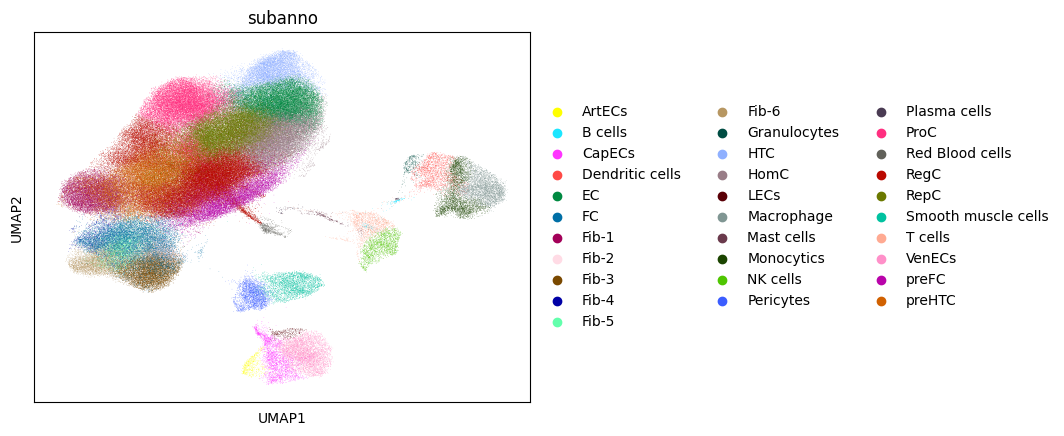

In [1]:
import scanpy as sc
adata=sc.read('/data/users/wangqinglin/wangqinglin_d3636615856043a6957bc3f4cd69aa28/online/data/public/public_cs_scanpy.h5ad')
sc.pl.umap(adata,color='subanno')

In [9]:
adata

AnnData object with n_obs × n_vars = 245135 × 45841
    obs: 'orig.ident', 'state', 'tissue', 'location', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'scDblFinder', 'contamination', 'leiden', 'r1.5', 'r1.0', 'r1.8', 'r2.0', 'anno1', 'tissue_state', 'subanno'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'anno1_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'orig.ident_colors', 'pca', 'r1.0_colors', 'r1.5_colors', 'r1.8_colors', 'r2.0_colors', 'state_colors', 'subanno_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

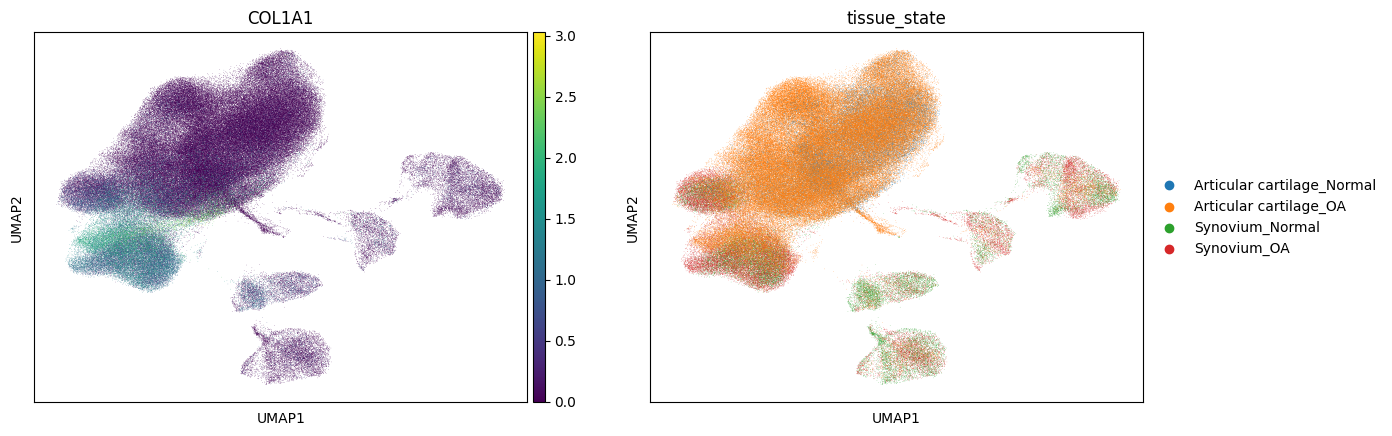

In [10]:
sc.pl.umap(adata,color=['COL1A1','tissue_state'],use_raw=False)

In [4]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [6]:
cell_0 = adata.X[0, :].toarray().flatten()  # 转为1D数组

# 查看前10个基因的表达
print(cell_0[:10])

[0.        0.        0.4986018 0.        0.        0.        0.
 0.        0.        0.       ]


In [7]:
import numpy as np

# 检查 adata.X 的最大值（适用于稀疏矩阵）
max_value = adata.X.max()
print(f"adata.X 的最大值是: {max_value}")

adata.X 的最大值是: 4.522353172302246
